In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Load train and test datasets
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

In [107]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (1900, 17)
Test shape: (211, 17)


In [108]:
test_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,35,1.71,84.72,yes,yes,2.88,3.0,Sometimes,no,3.00,no,2.00,0.832,no,Automobile,Overweight_Level_II
1,Male,19,1.75,100.00,yes,yes,2.00,3.0,Frequently,no,2.00,no,2.00,0.000,no,Public_Transportation,Obesity_Type_I
2,Male,19,1.85,65.00,yes,no,2.00,3.0,Sometimes,no,3.00,no,2.00,1.000,Sometimes,Bike,Normal_Weight
3,Male,31,1.78,120.64,yes,yes,2.50,3.0,Sometimes,no,2.04,no,0.84,0.490,Sometimes,Automobile,Obesity_Type_II
4,Male,25,1.80,120.90,yes,yes,2.20,3.0,Sometimes,no,2.51,no,1.66,0.128,Sometimes,Public_Transportation,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Female,26,1.67,104.59,yes,yes,3.00,3.0,Sometimes,no,1.57,no,0.21,0.882,Sometimes,Public_Transportation,Obesity_Type_III
207,Male,20,1.87,75.00,no,yes,2.00,3.0,Frequently,no,1.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
208,Male,27,1.77,118.15,yes,no,2.18,3.0,Sometimes,no,2.28,no,0.68,0.000,Sometimes,Automobile,Obesity_Type_II
209,Male,31,1.89,129.35,yes,yes,2.50,3.0,Sometimes,yes,1.13,no,0.95,1.023,Sometimes,Public_Transportation,Obesity_Type_II


In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1900 non-null   object 
 1   Age                             1900 non-null   int64  
 2   Height                          1900 non-null   float64
 3   Weight                          1900 non-null   float64
 4   family_history_with_overweight  1900 non-null   object 
 5   FAVC                            1900 non-null   object 
 6   FCVC                            1888 non-null   float64
 7   NCP                             1900 non-null   float64
 8   CAEC                            1900 non-null   object 
 9   SMOKE                           1900 non-null   object 
 10  CH2O                            1900 non-null   float64
 11  SCC                             1900 non-null   object 
 12  FAF                             19

In [110]:
test_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [111]:
train_df.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              12
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                              28
MTRANS                             0
NObeyesdad                         0
dtype: int64

## Checking Correlation

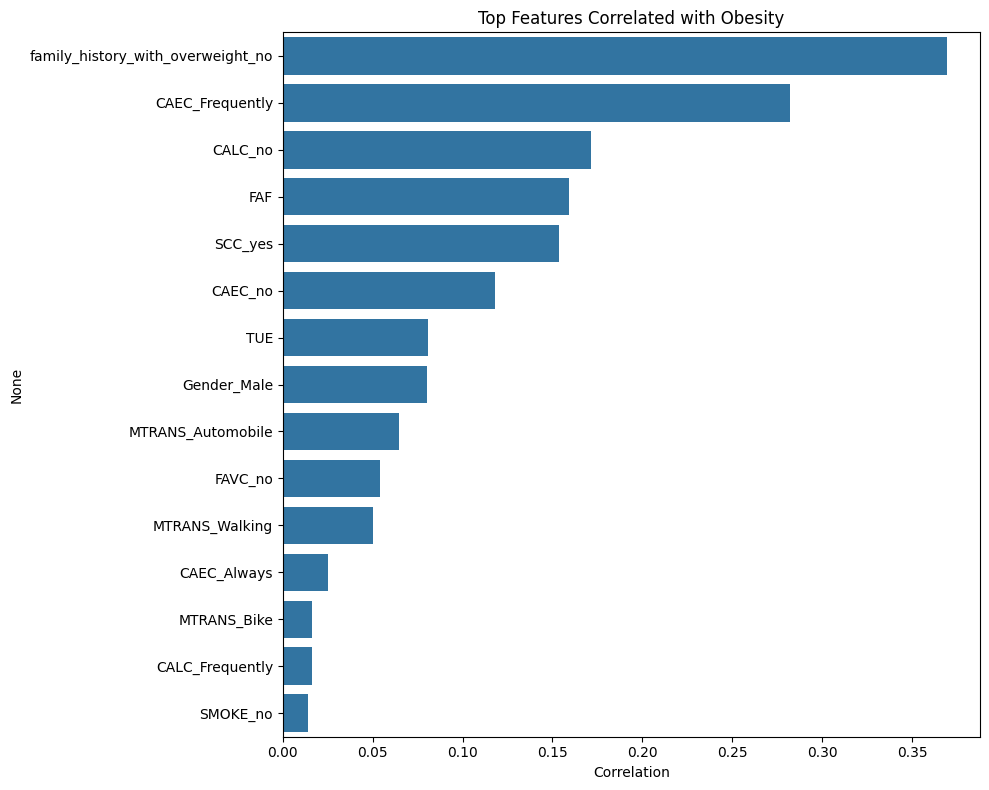

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,target_numeric,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,18,1.82,142.10,3.00,3.00,2.71,2.00,0.814,0,True,...,False,False,False,True,False,False,False,False,True,False
1,32,1.84,98.26,2.33,1.82,2.56,1.33,0.481,1,False,...,False,False,False,True,False,True,False,False,False,False
2,24,1.76,117.33,1.54,3.00,2.00,1.63,0.631,2,False,...,False,False,False,False,False,False,False,False,True,False
3,26,1.62,110.68,3.00,3.00,2.69,0.00,0.425,0,True,...,False,False,False,False,False,False,False,False,True,False
4,32,1.78,121.20,2.76,3.00,2.16,0.43,0.716,2,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,47,1.64,81.98,2.04,1.42,1.83,0.00,0.000,4,True,...,False,False,False,False,True,True,False,False,False,False
1896,24,1.61,99.96,3.00,1.42,1.00,1.19,1.384,2,False,...,False,False,False,False,True,False,False,False,True,False
1897,25,1.83,118.42,1.46,3.00,2.36,1.14,0.101,2,False,...,False,False,False,True,False,False,False,False,True,False
1898,23,1.65,94.79,2.00,3.00,1.49,0.65,1.000,4,False,...,False,False,False,False,True,False,False,False,True,False


In [112]:
# Convert target to numeric first
target_mapping = {cat: i for i, cat in enumerate(train_df['NObeyesdad'].unique())}
train_df['target_numeric'] = train_df['NObeyesdad'].map(target_mapping)

# Handle categorical features
data = train_df.copy()
for col in data.select_dtypes(include=['object']).columns:
    if col != 'NObeyesdad':
        # Create dummy variables and drop the original
        dummies = pd.get_dummies(data[col], prefix=col, drop_first=False)
        data = pd.concat([data, dummies], axis=1)
        data.drop(col, axis=1, inplace=True)

# Drop the original target column
if 'NObeyesdad' in data.columns:
    data.drop('NObeyesdad', axis=1, inplace=True)

# Calculate correlation with numeric target
correlations = data.corr()['target_numeric'].drop('target_numeric').sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values[:15], y=correlations.index[:15])
plt.title('Top Features Correlated with Obesity')
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()
data

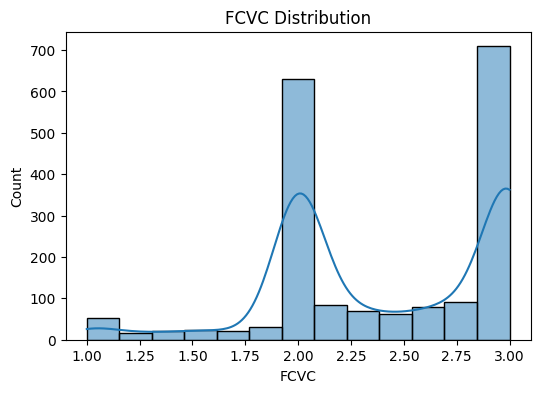

FCVC Skewness: -0.4312415617769585


In [113]:
# Simple FCVC plot for skewness check
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(train_df['FCVC'], kde=True)
plt.title('FCVC Distribution')
plt.show()

# Print skewness value
skew = train_df['FCVC'].skew()
print(f"FCVC Skewness: {skew}")

In [114]:
print("Sum of test duplicates", test_df.duplicated().sum())
print("Sum of train duplicates", train_df.duplicated().sum())

Sum of test duplicates 0
Sum of train duplicates 22


In [115]:
## Safely drop duplicates
train_df_duplicates_handled = train_df.drop_duplicates()
print(train_df_duplicates_handled.duplicated().sum())

0


 ### Filling FCVC

In [116]:
# Fill FCVC with mode and drop CALC
mode_value = train_df_duplicates_handled['FCVC'].mode()[0]
train_df_duplicates_handled_filled_FCVC = train_df_duplicates_handled.fillna({'FCVC': mode_value})
print(train_df_duplicates_handled_filled_FCVC.isnull().sum())

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                              28
MTRANS                             0
NObeyesdad                         0
target_numeric                     0
dtype: int64


### Dropping CALC with missingness

In [117]:
import numpy as np
calc_missing = train_df_duplicates_handled_filled_FCVC['CALC'].isnull().astype(int)

# Convert target to numeric
target_mapping = {cat: i for i, cat in enumerate(train_df_duplicates_handled_filled_FCVC['NObeyesdad'].unique())}
target_numeric = train_df_duplicates_handled_filled_FCVC['NObeyesdad'].map(target_mapping)

# Calculate correlation with target
target_corr = np.corrcoef(calc_missing, target_numeric)[0, 1]

# Print just the correlation number
print(f"{target_corr:.4f}")

-0.0208


In [118]:
train_df_duplicates_handled_filled_FCVC_dropped_CALC = train_df_duplicates_handled_filled_FCVC.dropna()
train_df_duplicates_handled_drop_missing = train_df_duplicates_handled_filled_FCVC_dropped_CALC
train_df_duplicates_handled_drop_missing.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
target_numeric                    0
dtype: int64

### Engineered features


train_df_duplicates_handled_drop_missing

In [119]:
train_df_duplicates_handled_drop_missing['BMI'] = train_df_duplicates_handled_drop_missing['Weight'] / (train_df_duplicates_handled_drop_missing['Height'] ** 2)
train_df_duplicates_handled_drop_missing['Hydration'] = train_df_duplicates_handled_drop_missing['CH2O'] / train_df_duplicates_handled_drop_missing['NCP']
train_df_duplicates_handled_drop_missing['CalorieBurnProxy'] = train_df_duplicates_handled_drop_missing['FAF'] * train_df_duplicates_handled_drop_missing['Weight']
train_df_duplicates_handled_drop_missing.head()


/tmp/ipykernel_52792/3292649639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing['BMI'] = train_df_duplicates_handled_drop_missing['Weight'] / (train_df_duplicates_handled_drop_missing['Height'] ** 2)
/tmp/ipykernel_52792/3292649639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing['Hydration'] = train_df_duplicates_handled_drop_missing['CH2O'] / train_df_duplicates_handled_drop_missing['NCP']
/tmp/ipykernel_52792/3292649

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,target_numeric,BMI,Hydration,CalorieBurnProxy
0,Female,18,1.82,142.10,yes,yes,3.00,3.00,Sometimes,no,...,no,2.00,0.814,Sometimes,Public_Transportation,Obesity_Type_III,0,42.899408,0.903333,284.2000
1,Male,32,1.84,98.26,yes,yes,2.33,1.82,Sometimes,no,...,no,1.33,0.481,Sometimes,Automobile,Overweight_Level_II,1,29.022921,1.406593,130.6858
10,Male,18,1.72,53.00,yes,yes,2.00,3.00,Sometimes,no,...,no,0.00,2.000,Sometimes,Public_Transportation,Insufficient_Weight,6,17.915089,0.666667,0.0000
11,Female,20,1.60,44.81,no,no,3.00,2.97,Frequently,no,...,yes,0.88,0.000,Sometimes,Public_Transportation,Insufficient_Weight,6,17.503906,0.387205,39.4328
12,Female,37,1.51,63.18,yes,yes,2.05,1.05,Sometimes,no,...,no,0.15,0.226,Sometimes,Automobile,Overweight_Level_I,5,27.709311,1.904762,9.4770


In [120]:
test_df['BMI'] = test_df['Weight'] / (test_df['Height'] ** 2)
test_df['Hydration'] = test_df['CH2O'] / test_df['NCP']
test_df['CalorieBurnProxy'] = test_df['FAF'] * test_df['Weight']



In [121]:
features_numbers = ['Age','Height','Weight','BMI','Hydration','CalorieBurnProxy'] ## goes into standard scaling
features_nominal = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS']
feature_ordinal = ['FCVC','NCP','CH2O', 'CAEC', 'FAF','CALC', 'TUE', 'NObeyesdad' ]
label_encoders = ['CAEC', 'CALC', 'NObeyesdad']
hot_encoders = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS']
scale_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CAEC', 'CALC','BMI','Hydration','CalorieBurnProxy' ]

In [122]:
import pandas as pd

Before Clipping Outliers:

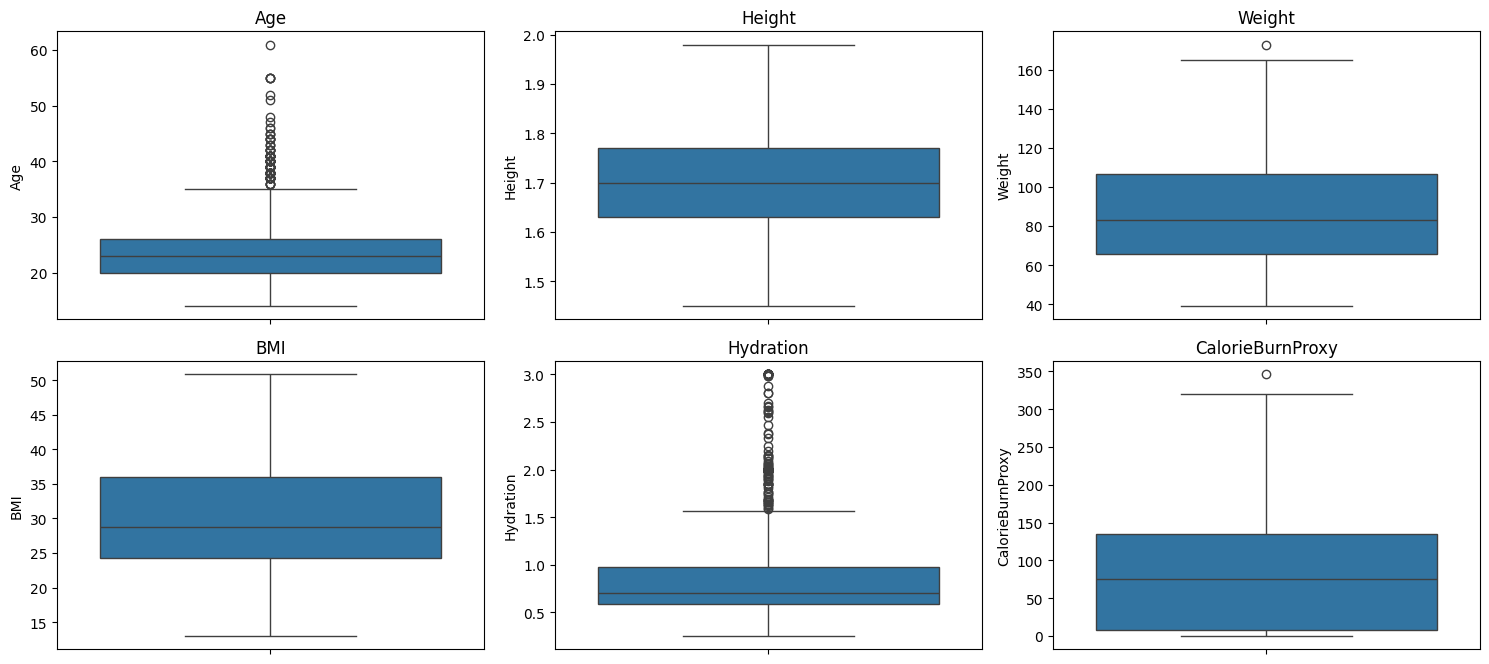

In [123]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_numbers):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=train_df_duplicates_handled_drop_missing[col])
    plt.title(col)
plt.tight_layout()
plt.show()

After Clipping Outliers:


In [124]:
for col in features_numbers:
        if pd.api.types.is_numeric_dtype(train_df_duplicates_handled_drop_missing[col]):
            Q1 = train_df_duplicates_handled_drop_missing[col].quantile(0.25)
            Q3 = train_df_duplicates_handled_drop_missing[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap the outliers
            train_df_duplicates_handled_drop_missing[col] = train_df_duplicates_handled_drop_missing[col].clip(lower=lower_bound, upper=upper_bound)
            train_df=train_df_duplicates_handled_drop_missing[col]


/tmp/ipykernel_52792/2445984840.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing[col] = train_df_duplicates_handled_drop_missing[col].clip(lower=lower_bound, upper=upper_bound)
/tmp/ipykernel_52792/2445984840.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing[col] = train_df_duplicates_handled_drop_missing[col].clip(lower=lower_bound, upper=upper_bound)
/tmp/ipykernel_52792/2445984840.py:10: SettingWithCopyWarning: 
A va

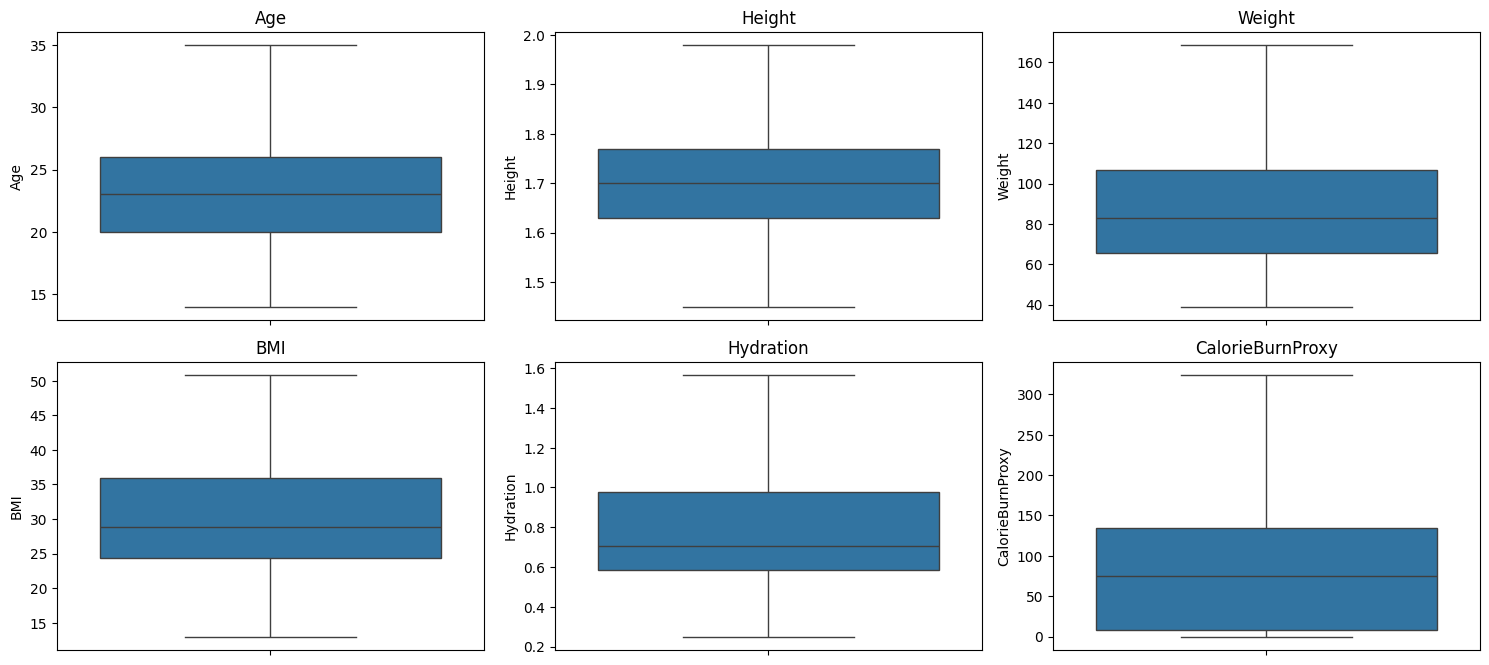

In [125]:


# Create a grid of boxplots for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_numbers):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=train_df_duplicates_handled_drop_missing[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Class Distribution Plot

/tmp/ipykernel_52792/2251707430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=train_df_duplicates_handled_drop_missing,


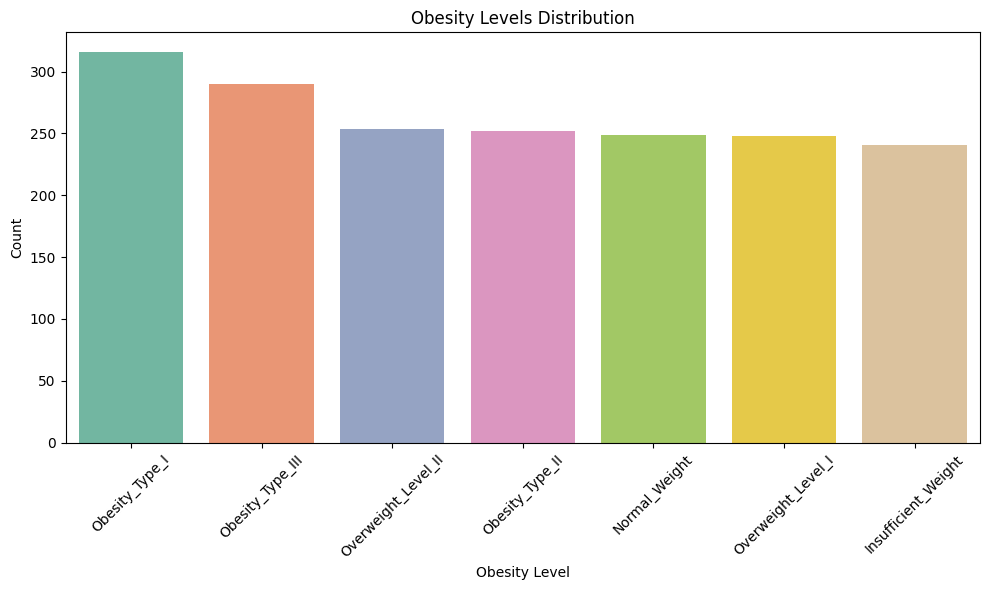

In [126]:
# Class distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=train_df_duplicates_handled_drop_missing,
              order=train_df_duplicates_handled_drop_missing['NObeyesdad'].value_counts().index,
              palette='Set2')
plt.xticks(rotation=45)
plt.title('Obesity Levels Distribution')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Correlation Heatmap

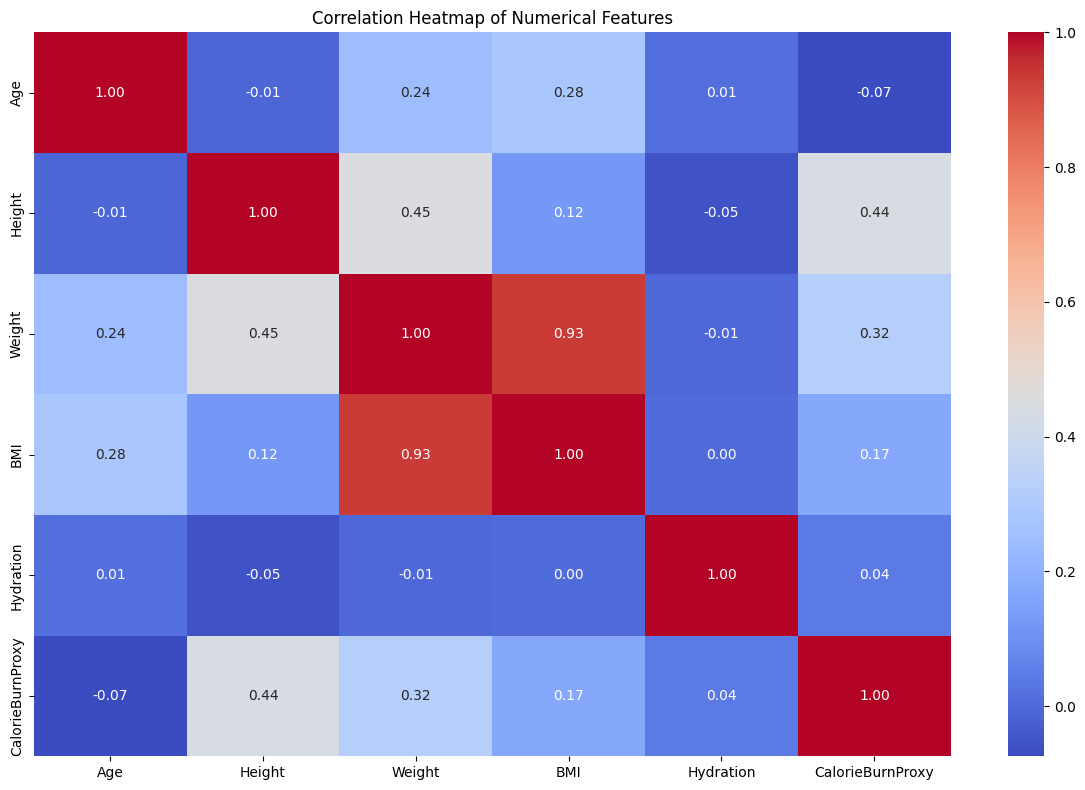

In [127]:
# Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
corr = train_df_duplicates_handled_drop_missing[features_numbers].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Encoding:

## Label Encoding Target

In [128]:

from sklearn.preprocessing import LabelEncoder

label_encoders = ['CAEC', 'CALC', 'NObeyesdad']

# Create a dictionary to store the label encoders
encoders = {}

# Iterate through each feature and encode it
for feature in label_encoders:
      # Create a new label encoder for each feature
    encoders[feature] = LabelEncoder()

    # Fit and transform the training data
    train_df_duplicates_handled_drop_missing[feature] = encoders[feature].fit_transform(train_df_duplicates_handled_drop_missing[feature])

    # Transform the test data using the same encoder
    test_df[feature] = encoders[feature].transform(test_df[feature])

    # Print the mapping for each feature
    print(f"\nMapping for {feature}:")
    for i, label in enumerate(encoders[feature].classes_):
        print(f"{label} → {i}")

        train_df_duplicates_handled_drop_missing



Mapping for CAEC:
Always → 0
Frequently → 1
Sometimes → 2
no → 3

Mapping for CALC:
Always → 0
Frequently → 1
Sometimes → 2
no → 3

Mapping for NObeyesdad:
Insufficient_Weight → 0
Normal_Weight → 1
Obesity_Type_I → 2
Obesity_Type_II → 3
Obesity_Type_III → 4
Overweight_Level_I → 5
Overweight_Level_II → 6


/tmp/ipykernel_52792/1030716610.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing[feature] = encoders[feature].fit_transform(train_df_duplicates_handled_drop_missing[feature])
/tmp/ipykernel_52792/1030716610.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing[feature] = encoders[feature].fit_transform(train_df_duplicates_handled_drop_missing[feature])
/tmp/ipykernel_52792/1030716610.py:14: SettingWithCopyWarning: 
A value 

In [129]:
x_train  = train_df_duplicates_handled_drop_missing.drop('NObeyesdad', axis=1)
y_train = train_df_duplicates_handled_drop_missing['NObeyesdad']

x_test = test_df.drop('NObeyesdad', axis=1)
y_test = test_df['NObeyesdad']

print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())



    Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   Female   18    1.82  142.10                            yes  yes  3.00   
1     Male   32    1.84   98.26                            yes  yes  2.33   
10    Male   18    1.72   53.00                            yes  yes  2.00   
11  Female   20    1.60   44.81                             no   no  3.00   
12  Female   35    1.51   63.18                            yes  yes  2.05   

     NCP  CAEC SMOKE  CH2O  SCC   FAF    TUE  CALC                 MTRANS  \
0   3.00     2    no  2.71   no  2.00  0.814     2  Public_Transportation   
1   1.82     2    no  2.56   no  1.33  0.481     2             Automobile   
10  3.00     2    no  2.00   no  0.00  2.000     2  Public_Transportation   
11  2.97     1    no  1.15  yes  0.88  0.000     2  Public_Transportation   
12  1.05     2    no  2.00   no  0.15  0.226     2             Automobile   

    target_numeric        BMI  Hydration  CalorieBurnProxy  
0            

## Hot Encoding for the rest of the features

In [130]:
x_train_encoded = pd.get_dummies(x_train, columns=hot_encoders, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=hot_encoders, drop_first=True)

In [131]:
x_train_encoded.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,CalorieBurnProxy,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,18,1.82,142.10,3.00,3.00,2,2.71,2.00,0.814,2,...,284.2000,False,True,True,False,False,False,False,True,False
1,32,1.84,98.26,2.33,1.82,2,2.56,1.33,0.481,2,...,130.6858,True,True,True,False,False,False,False,False,False
10,18,1.72,53.00,2.00,3.00,2,2.00,0.00,2.000,2,...,0.0000,True,True,True,False,False,False,False,True,False
11,20,1.60,44.81,3.00,2.97,1,1.15,0.88,0.000,2,...,39.4328,False,False,False,False,True,False,False,True,False
12,35,1.51,63.18,2.05,1.05,2,2.00,0.15,0.226,2,...,9.4770,False,True,True,False,False,False,False,False,False


In [132]:
x_test_encoded.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,CalorieBurnProxy,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,35,1.71,84.72,2.88,3.0,2,3.00,2.00,0.832,3,...,169.4400,True,True,True,False,False,False,False,False,False
1,19,1.75,100.00,2.00,3.0,1,2.00,2.00,0.000,3,...,200.0000,True,True,True,False,False,False,False,True,False
2,19,1.85,65.00,2.00,3.0,2,3.00,2.00,1.000,2,...,130.0000,True,True,False,False,False,True,False,False,False
3,31,1.78,120.64,2.50,3.0,2,2.04,0.84,0.490,2,...,101.3376,True,True,True,False,False,False,False,False,False
4,25,1.80,120.90,2.20,3.0,2,2.51,1.66,0.128,2,...,200.6940,True,True,True,False,False,False,False,True,False


In [133]:
y_test.head()

0    6
1    2
2    1
3    3
4    3
Name: NObeyesdad, dtype: int64

In [134]:
y_train.head()

0     4
1     6
10    0
11    0
12    5
Name: NObeyesdad, dtype: int64

### StandardScaler – zero mean, unit variance

In [135]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
x_train_encoded_std = x_train_encoded.copy()
x_test_encoded_std = x_test_encoded.copy()

# Fit on train, transform train
x_train_encoded_std[scale_features] = scaler_std.fit_transform(x_train_encoded[scale_features])
# Transform test
x_test_encoded_std[scale_features] = scaler_std.transform(x_test_encoded[scale_features])


x_train_encoded_std.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,CalorieBurnProxy,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-1.123747,1.276760,2.127176,1.073834,0.390978,0.318310,1.147598,1.158039,0.238300,-0.521828,...,2.584947,False,True,True,False,False,False,False,True,False
1,1.546195,1.492942,0.446797,-0.176370,-1.145015,0.318310,0.900398,0.376071,-0.310510,-0.521828,...,0.582487,True,True,True,False,False,False,False,False,False
10,-1.123747,0.195849,-1.288011,-0.792142,0.390978,0.318310,-0.022484,-1.176196,2.192921,-0.521828,...,-1.122196,True,True,True,False,False,False,False,True,False
11,-0.742326,-1.101243,-1.601932,1.073834,0.351928,-1.878976,-1.423287,-0.149132,-1.103236,-0.521828,...,-0.607829,False,False,False,False,True,False,False,True,False
12,2.118326,-2.074063,-0.897813,-0.698843,-2.147316,0.318310,-0.022484,-1.001128,-0.730770,-0.521828,...,-0.998576,False,True,True,False,False,False,False,False,False


### MinMaxScaler – scale to range [0, 1]

In [136]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
x_train_encoded_minmax = x_train_encoded.copy()
x_test_encoded_minmax = x_test_encoded.copy()

x_train_encoded_minmax[scale_features] = scaler_minmax.fit_transform(x_train_encoded[scale_features])
x_test_encoded_minmax[scale_features] = scaler_minmax.transform(x_test_encoded[scale_features])

x_train_encoded_minmax.head()


,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,CalorieBurnProxy,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.190476,0.698113,0.795187,1.000,0.666667,0.666667,0.855,0.666667,0.4070,0.666667,...,0.876896,False,True,True,False,False,False,False,True,False
1,0.857143,0.735849,0.457059,0.665,0.273333,0.666667,0.780,0.443333,0.2405,0.666667,...,0.403230,True,True,True,False,False,False,False,False,False
10,0.190476,0.509434,0.107979,0.500,0.666667,0.666667,0.500,0.000000,1.0000,0.666667,...,0.000000,True,True,True,False,False,False,False,True,False
11,0.285714,0.283019,0.044811,1.000,0.656667,0.333333,0.075,0.293333,0.0000,0.666667,...,0.121669,False,False,False,False,True,False,False,True,False
12,1.000000,0.113208,0.186495,0.525,0.016667,0.666667,0.500,0.050000,0.1130,0.666667,...,0.029241,False,True,True,False,False,False,False,False,False


In [137]:
x_train_encoded

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,CalorieBurnProxy,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,18,1.82,142.10,3.00,3.00,2,2.71,2.00,0.814,2,...,284.2000,False,True,True,False,False,False,False,True,False
1,32,1.84,98.26,2.33,1.82,2,2.56,1.33,0.481,2,...,130.6858,True,True,True,False,False,False,False,False,False
10,18,1.72,53.00,2.00,3.00,2,2.00,0.00,2.000,2,...,0.0000,True,True,True,False,False,False,False,True,False
11,20,1.60,44.81,3.00,2.97,1,1.15,0.88,0.000,2,...,39.4328,False,False,False,False,True,False,False,True,False
12,35,1.51,63.18,2.05,1.05,2,2.00,0.15,0.226,2,...,9.4770,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,35,1.64,81.98,2.04,1.42,2,1.83,0.00,0.000,3,...,0.0000,False,True,True,False,False,False,False,False,False
1896,24,1.61,99.96,3.00,1.42,2,1.00,1.19,1.384,3,...,118.9524,True,True,True,False,False,False,False,True,False
1897,25,1.83,118.42,1.46,3.00,2,2.36,1.14,0.101,2,...,134.9988,True,True,True,False,False,False,False,True,False
1898,23,1.65,94.79,2.00,3.00,2,1.49,0.65,1.000,3,...,61.6135,True,True,True,False,False,False,False,True,False


## Feature selection

### 1. Pearson for KNN, SVM

In [138]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use f_classif which relies on correlation and works for classification problems
selector_pearson = SelectKBest(score_func=f_classif, k=10)


x_train_pearson = selector_pearson.fit_transform(x_train_encoded_std, y_train)
x_test_pearson = selector_pearson.transform(x_test_encoded_std)

# Get the selected feature names
pearson_features = x_train_encoded_std.columns[selector_pearson.get_support()]

# Convert to DataFrame
x_train_pearson = pd.DataFrame(x_train_pearson, columns=pearson_features)
x_test_pearson = pd.DataFrame(x_test_pearson, columns=pearson_features)


x_test_pearson


/home/expygmalion/pytorch_env/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- target_numeric


In [ ]:
pearson_features

### 2. Chi-squared for Logistic Regression

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2


selector = SelectKBest(score_func=chi2, k=10)
x_train_chi = selector.fit_transform(x_train_encoded_minmax, y_train)
x_test_chi = selector.transform(x_test_encoded_minmax)

# Get selected feature names
chi_features = x_train_encoded_minmax.columns[selector.get_support()]

# Create DataFrames for selected f
# x_train_chieatures
x_train_chi = pd.DataFrame(x_train_chi, columns=chi_features)
x_test_chi = pd.DataFrame(x_test_chi, columns=chi_features)

x_train_chi

In [ ]:
chi_features

In [ ]:
#  index after DataFrame transformations
# To avoid index mismatches later in training/plotting:
x_train_pearson.reset_index(drop=True, inplace=True)
x_test_pearson.reset_index(drop=True, inplace=True)
x_train_chi.reset_index(drop=True, inplace=True)
x_test_chi.reset_index(drop=True, inplace=True)


# Setting the features ready for modeling:


 We aim to validate the data's readiness for training by imposing checks and verifying some metrics relevant to each of the four select models we are to build (SVM, KNN,  Logistic).


## Feature Correlation check

In [ ]:
pearson_features

In [ ]:
import numpy as np
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(x_train_pearson[pearson_features].corr(), dtype=bool))
sns.heatmap(x_train_pearson[pearson_features].corr(),
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=mask,
            square=True)
plt.title("Pearson-Selected Feature Correlation (Upper Triangle)", pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
x_train_pearson.drop('Weight', axis=1, inplace=True)
x_test_pearson.drop('Weight', axis=1, inplace=True)
pearson_features = pearson_features.drop('Weight')


pearson_features

In [ ]:
chi_features

In [ ]:
import numpy as np
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(x_train_chi[chi_features].corr(), dtype=bool))
sns.heatmap(x_train_chi[chi_features].corr(),
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=mask,
            square=True)
plt.title("Chi-Square Selected Feature Correlation (Upper Triangle)", pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
x_train_chi.drop('Weight', axis=1, inplace=True)
x_test_chi.drop('Weight', axis=1, inplace=True)
chi_features= chi_features.drop('Weight')


pearson_features

## Distance Check for KNN

In [ ]:
from scipy.spatial.distance import pdist, squareform
dists = pdist(x_train_pearson.values, metric='euclidean')
plt.hist(dists, bins=50)
plt.title("Pairwise Euclidean Distances")
plt.show()


Observation: Bell shaped, no narrow peak.

## Class Balance Check
We check for imbalanced classes that would potentially bias model's prediction.

In [ ]:
y_train.value_counts(normalize=True).plot(kind='bar')

 Observation: All classes have < 10–15% class weights.

## Scaling check

In [ ]:
x_train_encoded_std[scale_features].describe().T[['mean', 'std']]

Observation: All means close to 0, all stds are ~1.

 ## Skewness Check


In [ ]:
x_train_encoded_std[scale_features].skew()


# Formalizing:


### DataFrames ready for modeling:
# 
 - `x_train_pearson`, `x_test_pearson`: Features selected using Pearson correlation (f_classif) after StandardScaler and handling high correlation. Suitable for SVM and KNN.

 
 - `x_train_chi`, `x_test_chi`: Features selected using Chi-squared after MinMaxScaler and handling high correlation. Suitable for Logistic Regression.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV  
//used RandomizedSearchCV because GridSearchCV was slow


In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

random_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=2021, eval_metric='mlogloss'),
    param_distributions=param_grid_xgb,
    cv=5
)

# Fit on training data
random_xgb.fit(x_train_encoded, y_train)


XGB Accuracy


In [ ]:
XGB_train_accuracy=accuracy_score(y_train,random_xgb.predict(x_train_encoded))
print("XGB Train Accuracy:",round(XGB_train_accuracy*100,2),"%")

XGB_test_accuracy=accuracy_score(y_test,random_xgb.predict(x_test_encoded))
print("XGB Test Accuracy:",round(XGB_test_accuracy*100,2),"%")

XGB Precision

In [ ]:
XGB_precision_train=precision_score(y_train,random_xgb.predict(x_train_encoded),average='weighted')
print("XGB Train Precision:",round(XGB_precision_train*100,2),"%")

XGB_precision_test=precision_score(y_test,random_xgb.predict(x_test_encoded),average='weighted')
print("XGB Test Precision:",round(XGB_precision_test*100,2),"%")

XGB recall


In [ ]:
XGB_recall_train=recall_score(y_train,random_xgb.predict(x_train_encoded),average='weighted')
print("XGB Train Recall:",round(XGB_recall_train*100,2),"%")

XGB_recall_test=recall_score(y_test,random_xgb.predict(x_test_encoded),average='weighted')
print("XGB Test Recall:",round(XGB_recall_test*100,2),"%")

XGB F1-score

In [ ]:
XGB_f1_train=f1_score(y_train,random_xgb.predict(x_train_encoded),average='weighted')
print("XGB Train F1-score:",round(XGB_f1_train*100,2),"%")

XGB_f1_test=f1_score(y_test,random_xgb.predict(x_test_encoded),average='weighted')
print("XGB Test F1-score:",round(XGB_f1_test*100,2),"%")

XGB confusion matrix

In [139]:
XGB_confusion_matrix=confusion_matrix(y_test,random_xgb.predict(x_test_encoded))
print("XGB Confusion Matrix:",XGB_confusion_matrix)

NameError: name 'confusion_matrix' is not defined

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svc = GridSearchCV(SVC(random_state=2021), param_grid_svc, cv=5)
grid_svc.fit(x_train_pearson, y_train)

SVM accuarcy

In [ ]:
SVM_train_accuracy=accuracy_score(y_train,grid_svc.predict(x_train_pearson))
print("SVM Train Accuracy:",round(SVM_train_accuracy*100,2),"%")

SVM_test_accuracy=accuracy_score(y_test,grid_svc.predict(x_test_pearson))
print("SVM Test Accuracy:",round(SVM_test_accuracy*100,2),"%")

SVM precision

In [ ]:
SVM_precision_train=precision_score(y_train,grid_svc.predict(x_train_pearson),average='weighted')
print("SVM Train Precision:",round(SVM_precision_train*100,2),"%")

SVM_precision_test=precision_score(y_test,grid_svc.predict(x_test_pearson),average='weighted')
print("SVM Test Precision:",round(SVM_precision_test*100,2),"%")

SVM recall

In [ ]:
SVM_recall_train=recall_score(y_train,grid_svc.predict(x_train_pearson),average='weighted')
print("SVM Train Recall:",round(SVM_recall_train*100,2),"%")

SVM_recall_test=recall_score(y_test,grid_svc.predict(x_test_pearson),average='weighted')
print("SVM Test Recall:",round(SVM_recall_test*100,2),"%")

SVM F-1 score

In [ ]:
SVM_F1_train=f1_score(y_train,grid_svc.predict(x_train_pearson),average='weighted')
print("SVM Train F1-score:",round(SVM_F1_train*100,2),"%")

SVM_F1_test=f1_score(y_test,grid_svc.predict(x_test_pearson),average='weighted')
print("SVM Test F1-score:",round(SVM_F1_test*100,2),"%")

SVM confsion matrix

In [ ]:
SVM_confusion_matrix=confusion_matrix(y_test,grid_svc.predict(x_test_pearson))
print("SVM Confusion Matrix:",SVM_confusion_matrix)

## Logistic Regression


In [ ]:
# Import necessary libraries for modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Generate Polynomial Features (Degree 2):

In [ ]:
# Create polynomial features to allow Logistic Regression to model nonlinear relationships
# degree=2 means we include squared terms and interaction terms between features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit polynomial transformer on training data and transform it
x_train_poly = poly.fit_transform(x_train_chi)

# Transform test data using the same polynomial transformer (do NOT fit again)
x_test_poly = poly.transform(x_test_chi)

 Initialize Logistic Regression Model with Increased Max Iterations

In [ ]:
# Initialize Logistic Regression model with a fixed random state for reproducibility
# max_iter=1000 ensures the solver has enough iterations to converge on complex data
model_LR = LogisticRegression(random_state=2021, max_iter=1000)

Train the Model on Polynomial Features

In [ ]:
# Train the Logistic Regression model using the transformed training data
model_LR.fit(x_train_poly, y_train)

Make Predictions on Train and Test Data

In [ ]:
# Predict target labels on the training set (for evaluating training performance)
train_preds = model_LR.predict(x_train_poly)
# Predict target labels on the test set (for evaluating generalization performance)
test_preds = model_LR.predict(x_test_poly)

Evaluate Model Performance Metrics

In [ ]:
# Calculate and print the accuracy score for train and test data
LR_train_accuracy = accuracy_score(y_train, train_preds)
print("LR Train Accuracy:", round(LR_train_accuracy * 100, 2), "%")

LR_test_accuracy = accuracy_score(y_test, test_preds)
print("LR Test Accuracy:", round(LR_test_accuracy * 100, 2), "%")

# Calculate and print weighted precision scores
LR_precision_train = precision_score(y_train, train_preds, average='weighted')
print("LR Train Precision:", round(LR_precision_train * 100, 2), "%")

LR_precision_test = precision_score(y_test, test_preds, average='weighted')
print("LR Test Precision:", round(LR_precision_test * 100, 2), "%")


In [ ]:

# Calculate and print weighted recall scores
LR_recall_train = recall_score(y_train, train_preds, average='weighted')
print("LR Train Recall:", round(LR_recall_train * 100, 2), "%")

LR_recall_test = recall_score(y_test, test_preds, average='weighted')
print("LR Test Recall:", round(LR_recall_test * 100, 2), "%")

# Calculate and print weighted F1 scores
LR_F1_train = f1_score(y_train, train_preds, average='weighted')
print("LR Train F1-score:", round(LR_F1_train * 100, 2), "%")

LR_F1_test = f1_score(y_test, test_preds, average='weighted')
print("LR Test F1-score:", round(LR_F1_test * 100, 2), "%")

 Display Confusion Matrix for Test Data

In [ ]:

LR_confusion_matrix = confusion_matrix(y_test, test_preds)
print("LR Confusion Matrix:\n", LR_confusion_matrix)

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
grid_KNN= GridSearchCV(KNeighborsClassifier(), param_grid_KNN, cv=5)
grid_KNN.fit(x_train_pearson, y_train)

KNN Accuracy

In [ ]:
KNN_accuracy_train=accuracy_score(y_train,grid_KNN.predict(x_train_pearson))
print("KNN Train Accuracy:",round(KNN_accuracy_train*100,2),"%")

KNN_accuracy_test=accuracy_score(y_test,grid_KNN.predict(x_test_pearson))
print("KNN Test Accuracy:",round(KNN_accuracy_test*100,2),"%")

KNN Precision

In [ ]:
KNN_precision_train=precision_score(y_train,grid_KNN.predict(x_train_pearson),average='weighted')
print("KNN Train Precision:",round(KNN_precision_train*100,2),"%")

KNN_precision_test=precision_score(y_test,grid_KNN.predict(x_test_pearson),average='weighted')
print("KNN Test Precision:",round(KNN_precision_test*100,2),"%")

KNN recall

In [ ]:
KNN_recall_train=recall_score(y_train,grid_KNN.predict(x_train_pearson),average='weighted')
print("KNN Train Recall:",round(KNN_recall_train*100,2),"%")

KNN_recall_test=recall_score(y_test,grid_KNN.predict(x_test_pearson),average='weighted')
print("KNN Test Recall:",round(KNN_recall_test*100,2),"%")

KNN F1-score

In [ ]:
KNN_F1_train=f1_score(y_train,grid_KNN.predict(x_train_pearson),average='weighted')
print("KNN Train F1-score:",round(KNN_F1_train*100,2),"%")

KNN_F1_test=f1_score(y_test,grid_KNN.predict(x_test_pearson),average='weighted')
print("KNN Test F1-score:",round(KNN_F1_test*100,2),"%")

KNN_confusion_matrix

In [ ]:
KNN_confusion_matrix=confusion_matrix(y_test,grid_KNN.predict(x_test_pearson))
print("KNN Confusion Matrix:",KNN_confusion_matrix)

##RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=2021), param_grid_rf, cv=5)
grid_rf.fit(x_train_encoded, y_train)

RF accuracy

In [ ]:
RF_accuracy_train=accuracy_score(y_train,grid_rf.predict(x_train_encoded))
print("RF Train Accuracy:",round(RF_accuracy_train*100,2),"%")

RF_accuracy_test=accuracy_score(y_test,grid_rf.predict(x_test_encoded))
print("RF Test Accuracy:",round(RF_accuracy_test*100,2),"%")

RF precision


In [ ]:
RF_precision_train=precision_score(y_train,grid_rf.predict(x_train_encoded),average='weighted')
print("RF Train Precision:",round(RF_precision_train*100,2),"%")

RF_precision_test=precision_score(y_test,grid_rf.predict(x_test_encoded),average='weighted')
print("RF Test Precision:",round(RF_precision_test*100,2),"%")

RF recall

In [ ]:
RF_recall_train=recall_score(y_train,grid_rf.predict(x_train_encoded),average='weighted')
print("RF Train Recall:",round(RF_recall_train*100,2),"%")

RF_recall_test=recall_score(y_test,grid_rf.predict(x_test_encoded),average='weighted')
print("RF Test Recall:",round(RF_recall_test*100,2),"%")

RF F1-score

In [ ]:
RF_F1_train=f1_score(y_train,grid_rf.predict(x_train_encoded),average='weighted')
print("RF Train F1-score:",round(RF_F1_train*100,2),"%")

RF_F1_test=f1_score(y_test,grid_rf.predict(x_test_encoded),average='weighted')
print("RF Test F1-score:",round(RF_F1_test*100,2),"%")

RF confusion matrix

In [ ]:
RF_confusion_matrix=confusion_matrix(y_test,grid_rf.predict(x_test_encoded))
print("RF Confusion Matrix:",RF_confusion_matrix)

## Final Conclusion

In this project, we aimed to predict obesity levels based on lifestyle habits, family history, and physical attributes using machine learning models.

### Best Performing Model
After training and evaluating multiple models (Logistic Regression, KNN, SVM, and Random Forest), the **Random Forest classifier** delivered the best overall performance. It achieved the highest accuracy, precision, recall, and F1-score on both the training and test datasets after hyperparameter tuning.

### Key Features Impacting Obesity
- **BMI (Body Mass Index)**: A derived feature that strongly correlates with obesity categories.
- **Family History of Overweight**: A major contributing factor to obesity risk.
- **Physical Activity (FAF)**: Lower activity levels were clearly associated with higher obesity.
- **High-Calorie Food Consumption (FAVC)** and **Water Intake (CH2O)**: Both significantly impacted obesity likelihood.
- **Vegetable Consumption (FCVC)** and **Calorie Monitoring (SCC)** also showed meaningful influence.

### Prevention Insights
- Promoting physical activity and reducing screen time can help reduce obesity risk.
- Encouraging regular water intake and balanced meals is essential.
- Education around family history and early intervention may help individuals take preventive measures sooner.
- Behavioral changes like reducing high-calorie snacks and increasing vegetable intake are crucial for maintaining healthy weight.

The developed system can assist in early detection and intervention strategies by evaluating individual lifestyle data and predicting obesity risk with confidence.